In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from astropy.table import Table
import scipy, pylab
import math
import astropy
import pyregion
from matplotlib.lines import Line2D
from astropy.io import fits
import matplotlib.cm as cmx
import matplotlib.colors as colors

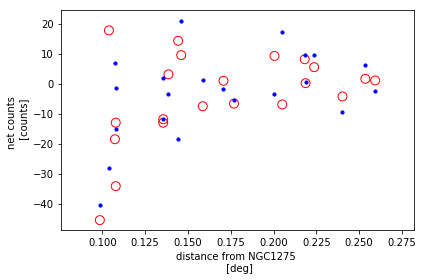

In [131]:
wittmann = Table.read('wittmann-2017.csv')
netcounts11714 = Table.read('netcounts/11714_netcounts.csv')
netcounts11715 = Table.read('netcounts/11715_netcounts.csv')
netcounts11713 = Table.read('netcounts/11713_netcounts.csv')

netcounts = np.append(netcounts11713['net_counts'], netcounts11714['net_counts']) 
netcounts = np.append(netcounts, netcounts11715['net_counts'])                                      # all netcount info

netcounts_300 = netcounts[0::2]
netcounts_2000 = netcounts[1::2]

idarray = np.append(netcounts11713['ID'], (netcounts11714['ID']))
idarray = np.append(idarray, (netcounts11715['ID']))

idarray
idnums_300 = []
for i in range(len(idarray)):
    idnum = str(idarray[i])
    num = idnum.split('.')[0] 
    idnums_300.append(num)             # get all of the investigated object IDs

idnums_300 = idnums[0::2]              # take every other id number (doubles of each)
idnums_300 = [int(n) for n in idnums]  # convert to integers


    
ra = np.zeros(len(idnums_300))
dec = np.zeros(len(idnums_300))

wittra = wittmann['ra']
wittdec = wittmann['dec']
wittID = wittmann['ID']

for i in range(len(wittID)):          # get the associated ra and dec for each investigated object from the wittmann data
    for j in range(len(idnums_300)):
        if wittID[i] == idnums_300[j]:
            ra[j] = wittra[i]
            dec[j] = wittdec[i]
            
#-----compute distances from NGC1275-----
def degreedist(ra, dec):
    raNGC = math.radians(49.95041666)
    decNGC = math.radians(41.51138889)
 
    ra = math.radians(ra)
    dec = math.radians(dec)
    cosdist = math.sin(decNGC)*math.sin(dec) + math.cos(decNGC)*math.cos(dec)*math.cos(raNGC - ra)
    return math.degrees(math.acos(cosdist))

distarray = np.zeros(len(ra))
for i in range(len(ra)):
    distarray[i] = degreedist(ra[i], dec[i])
distarray = distarray[0::2]

ax1 = pylab.subplot(111)
ax1.scatter(distarray, netcounts_300, s=80, facecolors='none', edgecolors='r', label='0.3-2kev')

ax1.scatter(distarray, netcounts_2000, s=10, c = 'b', marker = "o", label = '2-7kev')

#pylab.ylim([40.8, 42.0])
#pylab.xlim([])
plt.xlabel('distance from NGC1275 \n [deg]')
plt.ylabel('net counts \n [counts]')
plt.tight_layout()

plt.show()
    


In [ ]:
#ax1 = pylab.subplot(111)
ax1.scatter(songra, songdec, s=80, facecolors='none', edgecolors='r', label='Song')
ax1.scatter(wittmann['ra'], wittmann['dec'], s=10, c = 'b', marker = "o", label = 'Wittmann')
x1275 = [49.95041666]
y1275 = [41.51138889]
ax1.plot(x1275,y1275, '+r', label='NGC1275')           # plot NGC1275 (center of Perseus Cluster)
plt.legend(loc='lower right');

pylab.ylim([40.8, 42.0])
pylab.xlim([49.0, 51.0])
plt.xlabel('$ra [deg]$')
plt.ylabel('$dec [deg]$')
plt.tight_layout()

In [10]:
netcounts11715 = Table.read('netcounts/11715_netcounts.csv')
print(len(netcounts11715['net_counts']))

16
